## Assignment 1
Jonathan Pichot

In [77]:
from geopandas import GeoDataFrame
import pandas as pd
import shapely
import os
import zipfile

from fiona.crs import from_epsg
from descartes import PolygonPatch

%matplotlib inline

In [7]:
if os.getenv("PUIDATA"):
    data_path = os.getenv("PUIDATA")
else:
    os.system('mkdir data')
    data_path = "./data"

1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. Load it as a geopandas file

In [9]:
tracts_path = data_path + "/tracts.zip"

os.system("curl -o " + tracts_path + " http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyct2010_16d.zip")
tracts_zip = zipfile.ZipFile(tracts_path)
tracts_zip.extractall(data_path + '/tracts')

In [27]:
ct_shape = GeoDataFrame.from_file(data_path + '/tracts/nyct2010_16d/nyct2010.shp')

In [28]:
ct_shape.head(2)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5.788238e+06,9902.948473,"POLYGON ((967656.8290405273 155637.1314086914,..."


2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon

In [29]:
ct_shape.crs = from_epsg(2263)

In [30]:
ct_latlon = ct_shape.to_crs(epsg=4326)

In [34]:
ct_latlon = ct_latlon[ct_latlon["BoroName"] == "Brooklyn"]

In [35]:
ct_latlon.head(2)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
27,3000501,3,Brooklyn,I,000501,5.01,BK09,Brooklyn Heights-Cobble Hill,4004,9.015070e+05,4828.169912,POLYGON ((-73.99301822153384 40.69746236456678...
28,3002000,3,Brooklyn,I,002000,20,BK32,Sunset Park West,4012,1.620770e+06,5426.067279,POLYGON ((-74.01266264860631 40.64925555478156...


3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

From latlong.net, the coordinates of CUSP are: (40.693217, -73.986403)

In [50]:
cusp = shapely.geometry.Point(-73.986403, 40.693217)

4.. Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [54]:
# you will need to use 
# - ct_latlon.geometry (the polygons you are looping over)
# - shapely.geometry.asShape(<the polygon>).contain(<the point>)
# - save the index of the polygon that contains the CUSP
for i, ct in enumerate(ct_latlon.geometry.values):
    if shapely.geometry.asShape(ct).contains(cusp):
        cusp_ct = ct
        print('CUSP is contained in', ct)

CUSP is contained in POLYGON ((-73.98514306089652 40.6948851429698, -73.98516822349798 40.69435907630041, -73.9851960499562 40.69377775320608, -73.98519903380242 40.69371550175662, -73.98523569188235 40.69304536291662, -73.98527941476607 40.69215769710565, -73.98536391830876 40.69066661360505, -73.98633134976359 40.69105051063072, -73.9864643625356 40.69110361177523, -73.98734787420081 40.69145766844002, -73.9882070139312 40.69180696020943, -73.98893356311615 40.69208664198882, -73.98902944698999 40.69212386151998, -73.98910541743069 40.69215331402466, -73.9894723855446 40.69229549434763, -73.99066626290963 40.6924971765605, -73.99097186899587 40.69254880038537, -73.99085041475469 40.6927982506494, -73.99072896048503 40.6930477014476, -73.99058794464069 40.69339137896954, -73.99045286506302 40.69372058427398, -73.99044474094237 40.69382825143359, -73.99066605587349 40.69456882398396, -73.99080803777389 40.6950271337944, -73.99073995964307 40.69503174773607, -73.9900911495747 40.6950757

5.. Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot) and overplot the locati`on of cusp as a point (using pylab.scatter) Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

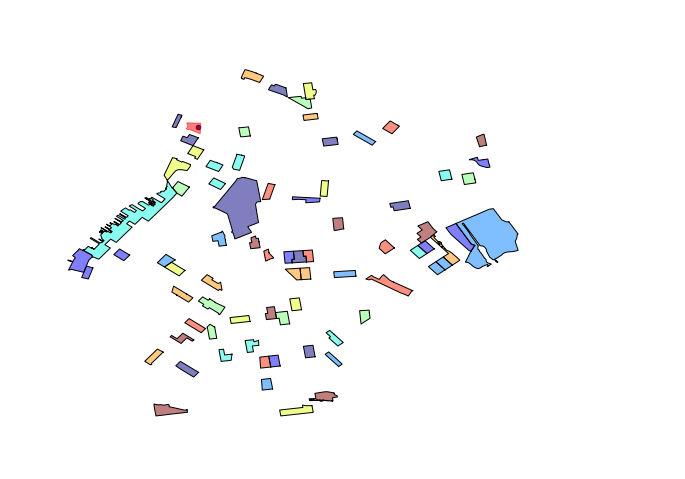

In [85]:
ax = ct_latlon.iloc[::10, :].plot(figsize=(28, 8))
tmp = ax.axis('off')

cusp_patch = PolygonPatch(cusp_ct, alpha=0.5, color="r")
ax.add_patch(cusp_patch)

ax.scatter(-73.986403, 40.693217)